In [69]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [35]:
train_df = pd.read_excel('Final_Train.xlsx')

In [36]:
test_df = pd.read_excel('Final_Test.xlsx')

In [37]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [39]:
train_df.nunique()

Qualification         1420
Experience              64
Rating                  51
Place                  877
Profile                  6
Miscellaneous_Info    2998
Fees                    40
dtype: int64

In [40]:
test_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [41]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [42]:
test_df.nunique()

Qualification          630
Experience              57
Rating                  36
Place                  592
Profile                  6
Miscellaneous_Info    1084
dtype: int64

In [43]:
train_df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [44]:
test_df.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [45]:
def change_exp(x):
    mah = x.split(' ')
    return mah[0]

In [46]:
train_df['Experience'] = train_df['Experience'].apply(change_exp)
test_df['Experience'] = test_df['Experience'].apply(change_exp)

In [47]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [48]:
train_df.drop('Miscellaneous_Info',axis = 1, inplace= True)
test_df.drop('Miscellaneous_Info',axis = 1, inplace= True)

In [49]:
def change_qual(x):
    mah = x.split(' ')
    mahs = x.split(',')
    if ',' not in x:
        return mah[0]
    else:
        return mahs[0]

In [50]:
train_df['Qualification']= train_df['Qualification'].apply(change_qual)
test_df['Qualification']= test_df['Qualification'].apply(change_qual)

In [51]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,BHMS,24,100%,"Kakkanad, Ernakulam",Homeopath,100
1,BAMS,12,98%,"Whitefield, Bangalore",Ayurveda,350
2,MBBS,9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,BSc - Zoology,12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,250


In [52]:
def remove_minus(x):
    cabs = x.split('-')
    if '-' in x:
        return cabs[0]
    else:
        return x

In [53]:
train_df['Qualification'] = train_df['Qualification'].apply(remove_minus)
test_df['Qualification'] = test_df['Qualification'].apply(remove_minus)

In [54]:
train_df['Qualification'].value_counts()

MBBS                                                  2448
BDS                                                   1208
BAMS                                                   711
BHMS                                                   706
MD                                                     264
                                                      ... 
PG Diploma in Child Health                               1
Doctorate of Medicine in Electro Homoeopathy(MDEH)       1
B.Ac                                                     1
Diploma in Family Medicine (DFM)                         1
Ayurvedic panchkarma                                     1
Name: Qualification, Length: 102, dtype: int64

In [55]:
test_df['Qualification'].value_counts()

MBBS                                                                   865
BDS                                                                    371
BHMS                                                                   232
BAMS                                                                   228
MD                                                                      74
MDS                                                                     48
MS                                                                      31
MD                                                                      18
DNB                                                                     13
DDVL                                                                    13
MDS                                                                     13
DHMS (Diploma in Homeopathic Medicine and Surgery)                       7
Diploma in Otorhinolaryngology (DLO)                                     6
B.Sc                     

In [56]:
def still_qual(x):
    dab=x.strip('.')
    tab= dab.lower()
    mylist=['bsc','diploma','certifi','doctor']
    if mylist[0] in tab:
        return 'BSC'
    elif mylist[1] in tab:
        return 'Diploma'
    elif mylist[2] in tab:
        return 'Certification'
    elif mylist[3] in tab:
        return 'PhD'
    else:
        return x

In [57]:
train_df['Qualification'] = train_df['Qualification'].apply(still_qual)
test_df['Qualification'] = test_df['Qualification'].apply(still_qual)

In [58]:
test_df['Qualification'].value_counts()

MBBS                                         865
BDS                                          371
BHMS                                         232
BAMS                                         228
MD                                            74
MDS                                           48
MS                                            31
Diploma                                       23
MD                                            18
DNB                                           13
DDVL                                          13
MDS                                           13
B.Sc                                           6
Get                                            6
MS                                             5
LCEH                                           5
BSC                                            5
DHMS                                           4
Certification                                  3
BSAM                                           2
DM                  

In [60]:
train_df['Experience'] = train_df['Experience'].astype(int)
test_df['Experience'] = test_df['Experience'].astype(int)

In [61]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  5961 non-null   object
 1   Experience     5961 non-null   int64 
 2   Rating         2659 non-null   object
 3   Place          5936 non-null   object
 4   Profile        5961 non-null   object
 5   Fees           5961 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 279.5+ KB


In [62]:
train_df['Experience'].max()

66

In [63]:
test_df['Experience'].max()

65

In [64]:
train_df.isnull().sum()

Qualification       0
Experience          0
Rating           3302
Place              25
Profile             0
Fees                0
dtype: int64

In [65]:
test_df.isnull().sum()

Qualification       0
Experience          0
Rating           1090
Place               6
Profile             0
dtype: int64

In [66]:
train_notnull = train_df[train_df['Rating'].notnull()]
test_notnull = test_df[test_df['Rating'].notnull()]

In [67]:
def remove_percent(x):
    mah=x.split('%')
    return mah[0]

In [70]:
train_notnull['Rating']= train_notnull['Rating'].apply(remove_percent)
test_notnull['Rating']= test_notnull['Rating'].apply(remove_percent)

In [71]:
train_notnull.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,BHMS,24,100,"Kakkanad, Ernakulam",Homeopath,100
1,BAMS,12,98,"Whitefield, Bangalore",Ayurveda,350
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,250
7,BDS,10,99,"Arekere, Bangalore",Dentist,200
12,BDS,9,98,"Coimbatore Racecourse, Coimbatore",Dentist,200


In [72]:
train_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2659 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  2659 non-null   object
 1   Experience     2659 non-null   int64 
 2   Rating         2659 non-null   object
 3   Place          2659 non-null   object
 4   Profile        2659 non-null   object
 5   Fees           2659 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 145.4+ KB


In [73]:
train_notnull['Rating'] = train_notnull['Rating'].astype(int)
test_notnull['Rating'] = test_notnull['Rating'].astype(int)

In [74]:
train_notnull.groupby('Profile')['Rating'].mean()

Profile
Ayurveda            96.327957
Dentist             97.706016
Dermatologists      93.506270
ENT Specialist      89.315789
General Medicine    91.592308
Homeopath           96.657692
Name: Rating, dtype: float64

In [75]:
def fillratings(cols):
    Rating = cols[0]
    Profile = cols[1]
    
    if pd.isnull(Rating):

        if Profile == 'Ayurveda':
            return '96%'

        elif Profile == 'Dentist':
            return '98%'
        elif Profile=='Dermatologists':
            return '94%'
        elif Profile=='ENT Specialist':
            return '89%'
        elif Profile=='General Medicine':
            return '92%'
        elif Profile=='Homeopath':
            return '97%'
    else:
        return Rating

In [76]:
train_df['Rating'] = train_df[['Rating','Profile']].apply(fillratings,axis = 1)

In [77]:
test_notnull.groupby('Profile')['Rating'].mean()

Profile
Ayurveda            96.126984
Dentist             97.674912
Dermatologists      93.263158
ENT Specialist      88.000000
General Medicine    92.871622
Homeopath           96.126437
Name: Rating, dtype: float64

In [78]:
def testfillratings(cols):
    Rating = cols[0]
    Profile = cols[1]
    
    if pd.isnull(Rating):

        if Profile == 'Ayurveda':
            return '96%'

        elif Profile == 'Dentist':
            return '98%'
        elif Profile=='Dermatologists':
            return '93%'
        elif Profile=='ENT Specialist':
            return '88%'
        elif Profile=='General Medicine':
            return '93%'
        elif Profile=='Homeopath':
            return '96%'
    else:
        return Rating

In [79]:
test_df['Rating'] = test_df[['Rating','Profile']].apply(fillratings,axis = 1)

In [80]:
test_df.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            6
Profile          0
dtype: int64

In [82]:
train_df.isnull().sum()

Qualification     0
Experience        0
Rating            0
Place            25
Profile           0
Fees              0
dtype: int64

In [87]:
train_df['Rating'] = train_df['Rating'].apply(remove_percent)
test_df['Rating'] = test_df['Rating'].apply(remove_percent)

In [89]:
train_df['Rating'] = train_df['Rating'].astype(int)
test_df['Rating'] = test_df['Rating'].astype(int)

In [90]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  5961 non-null   object
 1   Experience     5961 non-null   int64 
 2   Rating         5961 non-null   int64 
 3   Place          5936 non-null   object
 4   Profile        5961 non-null   object
 5   Fees           5961 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 279.5+ KB


In [91]:
def Place_exactly(x):
    mah=str(x).split(' ')
    return mah[-1]

In [93]:
train_place = train_df[train_df['Place'].notnull()]
test_place = test_df[test_df['Place'].notnull()]

In [94]:
train_place['Place'] = train_place['Place'].apply(Place_exactly)

In [96]:
train_place['Place'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
e                        1
Name: Place, dtype: int64

In [97]:
train_df['Place'].fillna('Malleswaram, Bangalore',inplace=True)

In [98]:
train_df['Place']= train_df['Place'].apply(Place_exactly)

In [99]:
def removethee(x):
    if x=='e':
        return 'Bangalore'
    else:
        return x

In [100]:
train_df['Place'] = train_df['Place'].apply(removethee)


In [101]:
train_df['Place'].value_counts()

Bangalore             1284
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Name: Place, dtype: int64

In [104]:
test_df['Place'].fillna('Malleswaram, Bangalore',inplace=True)

In [105]:
test_df['Place']= test_df['Place'].apply(Place_exactly)

In [106]:
test_df['Place'] = test_df['Place'].apply(removethee)

In [107]:
test_df['Place'].value_counts()

Bangalore             426
Delhi                 417
Mumbai                389
Hyderabad             333
Chennai               287
Coimbatore             70
Ernakulam              48
Thiruvananthapuram     17
Name: Place, dtype: int64

In [108]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  5961 non-null   object
 1   Experience     5961 non-null   int64 
 2   Rating         5961 non-null   int64 
 3   Place          5961 non-null   object
 4   Profile        5961 non-null   object
 5   Fees           5961 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 279.5+ KB


In [110]:
train_df[train_df['Rating']<50]

,Qualification,Experience,Rating,Place,Profile,Fees
55,MBBS,25,36,Bangalore,ENT Specialist,600
692,MBBS,29,33,Delhi,Dermatologists,500
911,Diploma,31,45,Mumbai,Homeopath,500
2585,MRCPCH (UK),19,7,Hyderabad,General Medicine,100
3126,MBBS,38,48,Delhi,ENT Specialist,800
3604,MBBS,33,40,Chennai,General Medicine,700
5028,MBBS,30,47,Bangalore,ENT Specialist,650
5127,MBBS,19,33,Bangalore,ENT Specialist,650


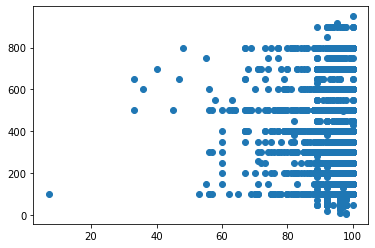

In [111]:
plt.scatter(train_df['Rating'], train_df['Fees'])

In [112]:
train_df.groupby('Place')["Fees"].mean()

Place
Bangalore             324.364486
Chennai               283.602339
Coimbatore            154.298246
Delhi                 362.911392
Ernakulam             188.431373
Hyderabad             307.507886
Mumbai                308.292863
Thiruvananthapuram    167.267442
Name: Fees, dtype: float64

In [113]:
def crat(x):
    if x<=50:
        return 1 
    if x>50:
        return 2

In [114]:
train_df['Rating'] = train_df['Rating'].apply(crat)
test_df['Rating'] = test_df['Rating'].apply(crat)

In [115]:
train_df.groupby('Rating')['Fees'].mean()

Rating
1    562.500000
2    307.602553
Name: Fees, dtype: float64

In [118]:
def exper(x):
    if x<=33:
        return 1
    if x>33:
        return 2

In [119]:
train_df['Experience'] = train_df['Experience'].apply(exper)
test_df['Experience'] = test_df['Experience'].apply(exper)

In [120]:
train_df.groupby('Experience')['Fees'].mean()

Experience
1    312.954683
2    268.045113
Name: Fees, dtype: float64

In [121]:
train_df['Place'].value_counts()

Bangalore             1284
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Name: Place, dtype: int64

In [122]:
place = train_df.groupby('Place')['Fees'].mean()

In [123]:
train_df['Place']= train_df['Place'].map(place)
test_df['Place']= test_df['Place'].map(place)

In [124]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,BHMS,1,2,188.431373,Homeopath,100
1,BAMS,1,2,324.364486,Ayurveda,350
2,MBBS,1,2,324.364486,ENT Specialist,300
3,BSC,1,2,324.364486,Ayurveda,250
4,BAMS,1,2,283.602339,Ayurveda,250


In [125]:
profile = train_df.groupby('Profile')['Fees'].mean()

In [126]:
train_df['Profile']= train_df['Profile'].map(profile)
test_df['Profile']= test_df['Profile'].map(profile)

In [127]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,BHMS,1,2,188.431373,306.499407,100
1,BAMS,1,2,324.364486,238.968193,350
2,MBBS,1,2,324.364486,387.321429,300
3,BSC,1,2,324.364486,238.968193,250
4,BAMS,1,2,283.602339,238.968193,250


In [128]:
qualification = train_df.groupby('Qualification')['Fees'].mean()

In [129]:
train_df['Qualification']= train_df['Qualification'].map(qualification)
test_df['Qualification']= test_df['Qualification'].map(qualification)

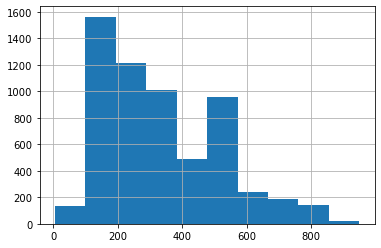

In [130]:
train_df['Fees'].hist()

In [131]:
train_df['Fees'] = np.log(train_df['Fees'])

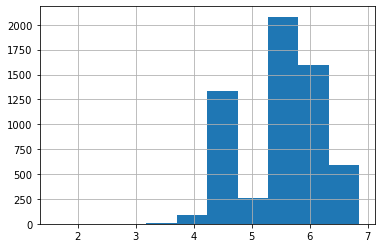

In [132]:
train_df['Fees'].hist()

In [133]:
X = train_df.drop('Fees', axis=1)
y = train_df['Fees']

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=101)

In [137]:
import lightgbm as lgb

In [138]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'eval_metric': 'rmsle',
    'max_depth': 7, 
    'learning_rate': 0.1,
    'verbose': 0, 
    'early_stopping_round': 30}
n_estimators = 700

In [139]:
d_train = lgb.Dataset(X_train, label=y_train)

In [140]:
d_valid = lgb.Dataset(X_test, label=y_test)

In [141]:
watchlist = [d_valid]

In [143]:
model = lgb.train(params, d_train, n_estimators, watchlist, verbose_eval=1)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's l2: 0.440246
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l2: 0.427177
[3]	valid_0's l2: 0.416708
[4]	valid_0's l2: 0.408357
[5]	valid_0's l2: 0.401524
[6]	valid_0's l2: 0.396379
[7

In [145]:
preds = model.predict(test_df)

In [146]:
preds = np.exp(preds)

In [147]:

Doctor=pd.DataFrame()

In [148]:
Doctor['Fees']=preds

In [149]:
Doctor.to_excel('doctor1.xlsx',index=False)

In [150]:
Doctor.head()

,Fees
0,181.418415
1,344.673649
2,253.090759
3,246.189086
4,215.212146


In [151]:
prete=model.predict(X_test)

In [152]:
from sklearn.metrics import mean_squared_error

In [153]:
np.sqrt(mean_squared_error(y_test,prete))

0.6147351496684083